In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_path = '/content/drive/MyDrive/PatternLab/train_knn.txt'
test_path = '/content/drive/MyDrive/PatternLab/test_knn.txt'

In [4]:
train_data = pd.read_csv(train_path,sep=",", header=None)
test_data = pd.read_csv(test_path,sep=",", header=None)

In [5]:
train_data

,0,1,2
0,7,7,1
1,7,4,1
2,6,4,1
3,7,5,1
4,7,6,1
5,6,7,1
6,6,6,1
7,3,4,2
8,2,3,2
9,3,2,2


In [6]:
test_data

,0,1
0,3,7
1,7,7
2,4,3
3,2,8
4,3,5
5,1,2
6,4,8
7,8,3
8,8,4


In [7]:
print(len(train_data))
print(len(test_data))

14
9


In [8]:
len(train_data[0])

14

In [9]:
train_data[2]

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     2
8     2
9     2
10    2
11    2
12    2
13    2
Name: 2, dtype: int64

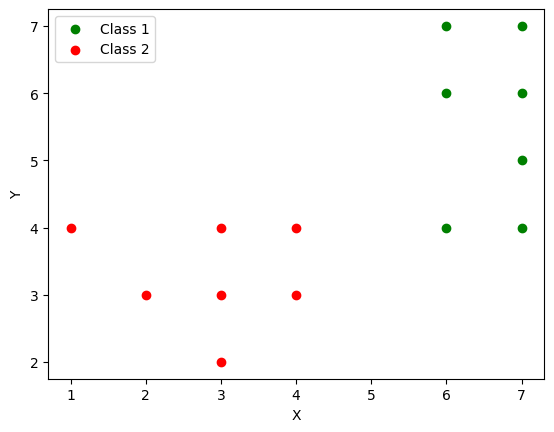

In [10]:
X = train_data[0]
Y = train_data[1]
cls = train_data[2]
cl_1 = 0
cl_2 = 0
for i in range(len(X)):
  if cls[i] == 1:
    color = 'green'
  else:
    color = 'red'
  if color == 'green' and cl_1==0:
    cl_1=1
    plt.scatter(X[i],Y[i],label = "Class 1",color = color)
    continue
  if color == 'red' and cl_2 == 0:
    cl_2=1
    plt.scatter(X[i],Y[i],label = "Class 2",color = color)
    continue
  plt.scatter(X[i],Y[i],color = color)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()


In [11]:
k = input("Enter K Value: ")
k=int(k)
print(k)

Enter K Value: 3
3


In [12]:
train_data = np.array(train_data)
test_data = np.array(test_data)

In [13]:
def square_distance(a,b,x,y):
  return np.square(a-x)+np.square(b-y)

In [14]:
def knn(x,y,printData):
  distance = []
  for i in range(len(train_data)):
    val = int(square_distance(x,y,train_data[i][0],train_data[i][1]))
    distance.append((train_data[i][2], val))

  distance.sort(key=lambda x:x[1])
  cnt = 0
  if printData == 1:
    print("Test point:",x,y)
  for i in range(k):
    if printData == 1:
      print("Distance",i+1,":",distance[i][1],end="\t\t")
      print("Class:",distance[i][0])
    if(distance[i][0] == 1):
      cnt+=1
    else:
      cnt-=1
  cls = 1

  if cnt>0:
    if printData == 1:
      print("Predicted Class: 1")
      print('')
  else:
    if printData == 1:
      print("Predicted Class: 2")
      print('')
    cls = 2

  return cls

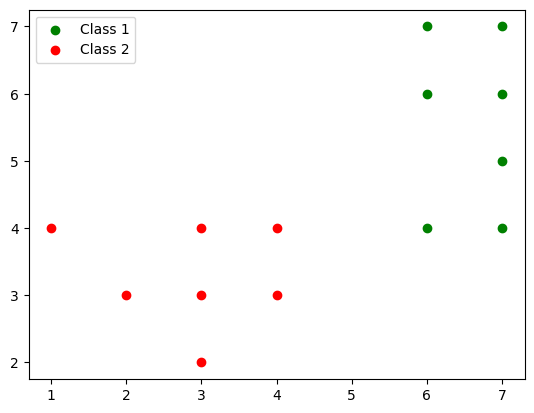

In [15]:
X = train_data[:,0]
Y = train_data[:,1]
cls = train_data[:,2]
cl_1 = 0
cl_2 = 0
for i in range(len(train_data)):
  if cls[i] == 1:
    clr = 'green'
  else:
    clr = 'red'

  if clr == 'green' and cl_1==0:
    cl_1=1
    plt.scatter(X[i],Y[i],label = "Class 1",color = clr)
    continue
  if clr == 'red' and cl_2 == 0:
    cl_2=1
    plt.scatter(X[i],Y[i],label = "Class 2",color = clr)
    continue
  plt.scatter(X[i],Y[i],color = clr)
plt.legend(loc='upper left')
plt.show()

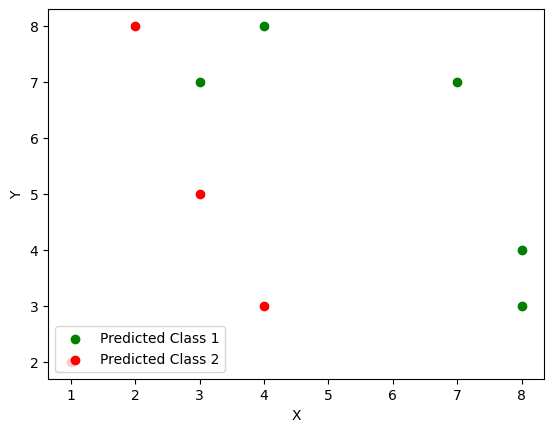

In [16]:
cl_1 = 0
cl_2 = 0
for i in range(len(test_data)):
  p1 = test_data[i][0]
  p2 = test_data[i][1]
  pr_cls = knn(p1,p2,0)
  if pr_cls == 1:
    clr = 'green'
  else:
    clr = 'red'

  if clr == 'green' and cl_1==0:
    cl_1=1
    plt.scatter(p1,p2,label = "Predicted Class 1",color = clr)
    continue
  if clr == 'red' and cl_2 == 0:
    cl_2=1
    plt.scatter(p1,p2,label = "Predicted Class 2",color = clr)
    continue
  plt.scatter(p1,p2,color = clr)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='lower left')

In [17]:
for i in range(len(test_data)):
  p1 = test_data[i][0]
  p2 = test_data[i][1]
  pr_cls = knn(p1,p2,1)

Test point: 3 7
Distance 1 : 9		Class: 1
Distance 2 : 9		Class: 2
Distance 3 : 10		Class: 1
Predicted Class: 1

Test point: 7 7
Distance 1 : 0		Class: 1
Distance 2 : 1		Class: 1
Distance 3 : 1		Class: 1
Predicted Class: 1

Test point: 4 3
Distance 1 : 0		Class: 2
Distance 2 : 1		Class: 2
Distance 3 : 1		Class: 2
Predicted Class: 2

Test point: 2 8
Distance 1 : 17		Class: 1
Distance 2 : 17		Class: 2
Distance 3 : 17		Class: 2
Predicted Class: 2

Test point: 3 5
Distance 1 : 1		Class: 2
Distance 2 : 2		Class: 2
Distance 3 : 4		Class: 2
Predicted Class: 2

Test point: 1 2
Distance 1 : 2		Class: 2
Distance 2 : 4		Class: 2
Distance 3 : 4		Class: 2
Predicted Class: 2

Test point: 4 8
Distance 1 : 5		Class: 1
Distance 2 : 8		Class: 1
Distance 3 : 10		Class: 1
Predicted Class: 1

Test point: 8 3
Distance 1 : 2		Class: 1
Distance 2 : 5		Class: 1
Distance 3 : 5		Class: 1
Predicted Class: 1

Test point: 8 4
Distance 1 : 1		Class: 1
Distance 2 : 2		Class: 1
Distance 3 : 4		Class: 1
Predicted Class: